# Notebook for Creating Light Model for Test Submission, and Computing Baseline Score and 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../kaggledata/train.csv')

## Create Quick Model 
#### model with minimal feature engineering/selection work

Note that this is a different feature set from the feature_lite feature set used in the Notebook 3 evaluations. The model in this notebook was just to quickly build a model without feature engineering to get a rough idea of what kind of score it yields, and to generate a kaggle test submission.

Some common sense variables to price a house in general:
- Floor area of the house
- Neighbourhood
- Age of the house
- Proximity to good or bad things (parks vs garbage dumps)
- Quality of the physical finishings of the house
- Luxury facilities like swimming pools

In [4]:
# intuitive selection of features for quick model
features_lite = ['Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond']

In [5]:
X = df[features_lite]

In [6]:
y = df['SalePrice']

In [7]:
X.shape

(2051, 4)

In [8]:
y.shape

(2051,)

In [9]:
X.isna().sum()

Gr Liv Area     0
Lot Area        0
Overall Qual    0
Overall Cond    0
dtype: int64

In [10]:
y.isna().sum()

0

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

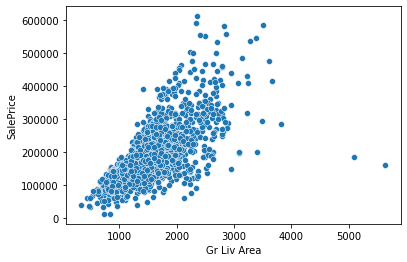

In [11]:
sns.scatterplot(x=X['Gr Liv Area'], y=y)

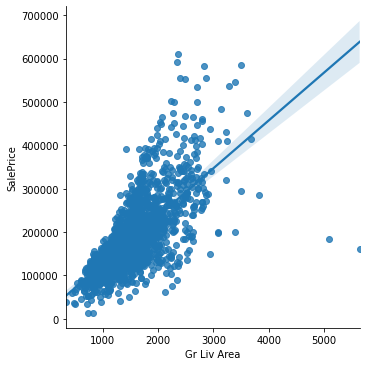

In [12]:
sns.lmplot(data=df, x='Gr Liv Area', y='SalePrice')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

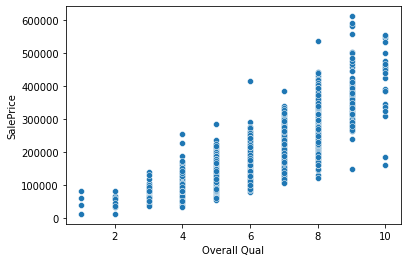

In [13]:
sns.scatterplot(x=X['Overall Qual'], y=y)

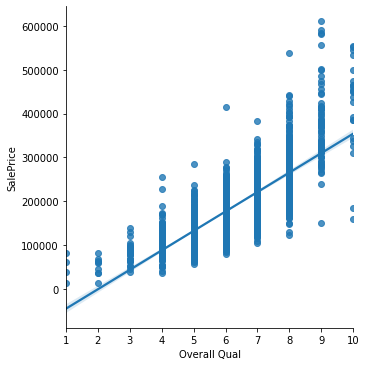

In [14]:
sns.lmplot(data=df, x='Overall Qual', y='SalePrice')

### Train Test Split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

### Linear Regression Model

In [16]:
- cross_val_score(LinearRegression(),
               X = X_train,
               y = y_train,
                cv = 5,
                scoring = 'neg_mean_squared_error').mean()

1707660032.1332023

In [17]:
cross_val_score(LinearRegression(),
               X = X_train,
               y = y_train,
                cv = 5).mean()

0.7241924846879261

In [18]:
# prepare model for prediction later on val set
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

### Scaling

In [24]:
scX = StandardScaler()
Xs_train = scX.fit_transform(X_train)

In [25]:
Xs_train

array([[-0.2797068 , -0.55407391, -0.08174675, -0.51606405],
       [ 0.93676105,  0.75984144,  1.32207178, -0.51606405],
       [-0.28366279,  1.07046524, -0.08174675,  0.39300689],
       ...,
       [-0.37662862,  0.02661854, -0.08174675,  0.39300689],
       [-1.01354349, -1.45759259, -0.08174675,  0.39300689],
       [ 0.05061862, -0.16000697,  0.62016252, -0.51606405]])

### Lasso Model

In [34]:
l_alphas = np.arange(0.00001, 0.30, 0.00005)

In [35]:
lasso = LassoCV(alphas=l_alphas, cv=5)

In [36]:
lasso.fit(Xs_train, y_train)

LassoCV(alphas=array([1.0000e-05, 6.0000e-05, 1.1000e-04, ..., 2.9986e-01, 2.9991e-01,
       2.9996e-01]),
        cv=5)

In [37]:
lasso.alpha_

1e-05

In [ ]:
# problem: alpha keeps being the lowest value in the range?

In [38]:
- cross_val_score(Lasso(),
               X = Xs_train,
               y = y_train,
                cv = 5,
                scoring = 'neg_mean_squared_error').mean()

1707662372.1854064

In [39]:
cross_val_score(Lasso(),
               X = Xs_train,
               y = y_train,
                cv = 5).mean()

0.724192223407243

### Ridge Model

In [40]:
r_alphas = np.logspace(0, 5, 200)

In [41]:
ridge = RidgeCV(alphas=r_alphas, cv=5)

In [42]:
ridge.fit(Xs_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=5)

In [43]:
ridge.alpha_

24.094035602395255

In [44]:
- cross_val_score(Ridge(alpha=ridge.alpha_),
               X = Xs_train,
               y = y_train,
                cv = 5,
                scoring = 'neg_mean_squared_error').mean()

1707780754.9267106

In [45]:
cross_val_score(Ridge(alpha=ridge.alpha_),
               X = Xs_train,
               y = y_train,
                cv = 5).mean()

0.7243131112630607

In [46]:
rm = Ridge(alpha=ridge.alpha_)
rm.fit(Xs_train, y_train)

Ridge(alpha=24.094035602395255)

### Evaluation of Lite Model on Validation Set

Plain Logistic Regression

In [48]:
(mean_squared_error(y_val, lin.predict(X_val)))**0.5

38066.11659999973

Lasso Regression

In [49]:
Xs_val = scX.fit(X_train).transform(X_val)
(mean_squared_error(y_val, rm.predict(Xs_val)))**0.5

38009.0278843834

**Baseline of just predicting means.**

In [53]:
just_y_means = np.full(y_val.shape, np.mean(y_val)) 
(mean_squared_error(y_val, just_y_means))**0.5

77081.22659808543

**Baseline of just predicting me\edian.**

In [78]:
just_y_meds = np.full(y_val.shape, np.median(y_val)) 
(mean_squared_error(y_val, just_y_meds))**0.5

79754.72179868045

### Get Results for Kaggle

In [54]:
df_test = pd.read_csv('../kaggledata/test.csv')

In [55]:
df_test[features_lite].isna().sum()

Gr Liv Area     0
Lot Area        0
Overall Qual    0
Overall Cond    0
dtype: int64

In [56]:
X_sub = df_test[features_lite]

In [57]:
Xs_sub = scX.fit(X_train).transform(X_sub)

In [58]:
df_test['SalePrice'] = rm.predict(Xs_sub)

In [59]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,193243.523275
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,166275.288654
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,226488.561795
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,116265.719906
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,172522.034270


In [71]:
df_test.set_index('Id', inplace=True)

In [72]:
df_test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,193243.523275
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,WD,166275.288654
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,New,226488.561795
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,116265.719906
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,185,0,NaN,NaN,NaN,0,7,2009,WD,172522.034270


In [74]:
submission = df_test[['SalePrice']]

In [75]:
submission.head(20)

,SalePrice
Id,
2658,193243.523275
2718,166275.288654
2414,226488.561795
1989,116265.719906
625,172522.034270
333,74625.050612
1327,88196.620572
858,130560.614939
95,207165.436426


In [76]:
# submission.to_csv('../kaggledata/trial_sub_060621.csv')

In [77]:
submission.shape

(879, 1)

Kaggle Score: 38560.96370 (Submitted 070621)